**Melakukan import library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA

Melakukan Input Data

In [ ]:
# Melakukan pembacaan deskripsi pada data
data_dictionary=pd.read_csv('data-dictionary.csv')
for i in range(len(data_dictionary['Column Name'])):
    print(data_dictionary['Column Name'][i],'\n\t',data_dictionary['Description'][i])

country 
	 Name of the country
child_mort 
	 Death of children under 5 years of age per 1000 live births
exports 
	 Exports of goods and services per capita. Given as %age of the GDP per capita
health 
	 Total health spending per capita. Given as %age of GDP per capita
imports 
	 Imports of goods and services per capita. Given as %age of the GDP per capita
Income 
	 Net income per person
Inflation 
	 The measurement of the annual growth rate of the Total GDP
life_expec 
	 The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer 
	 The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp 
	 The GDP per capita. Calculated as the Total GDP divided by the total population.


In [ ]:
# Pembacaan Country Data
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Melakukan deskripsi data
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# Melakukan info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


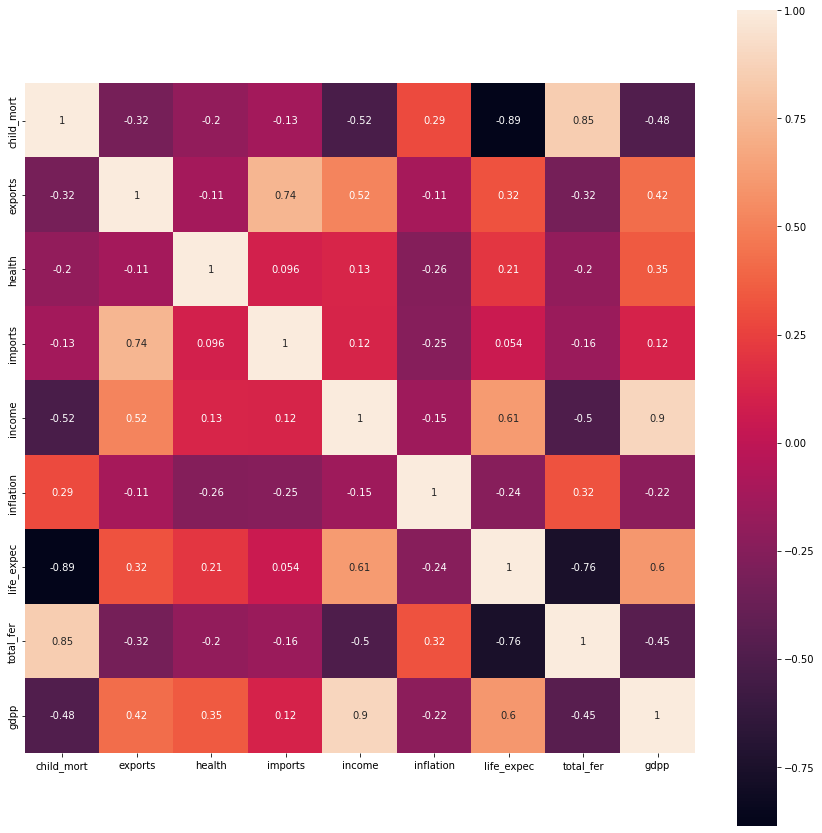

In [ ]:
#Menampilkan korelasi data dalam bentuk heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,square=True)

In [ ]:
#Pengecekan terhadap data yang bernilai '?'
count=0
for i in range(0,167):
    for j in range(0,10):
        if (data.iloc[i,j]=='?'):
            count =count+1
print(count)

0


In [ ]:
#Pengecekan terhadap data yang bernilai null
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
#Melakukan drop data yang bertipe object
dropped = data.select_dtypes('object').columns.to_list()
dropped
dataCopy = data
dataCopy = dataCopy.drop(dropped, axis=1)
dataCopy

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
# Melakukan penghapusan pada outlier
cont=data.dtypes[(data.dtypes!='object')].index
def remove_outlier(col):
  sorted(col)
  Q1,Q3=np.percentile(col,[25,75])
  IQR=Q3-Q1
  lower_range= Q1-(1.5 * IQR)
  upper_range= Q3+(1.5 * IQR)
  return lower_range, upper_range

for column in data[cont].columns:
  lr,ur=remove_outlier(data[column])
  data[column]=np.where(data[column]>ur,ur,data[column])
  data[column]=np.where(data[column]<lr,lr,data[column])

In [ ]:
# Scaling data dengan metode Min Max Scaler

dataScaler = data.drop('country',axis=1)
dataScaler = ((dataScaler - dataScaler.min()) / (dataScaler.max() - dataScaler.min())) * 10 + 1
dataScaler.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,7.244876,2.068535,5.687246,5.416757,1.194904,5.811421,3.345324,8.972685,1.097875
1,1.998040,4.013093,4.850528,5.781256,2.814889,4.066620,9.129496,1.853606,2.172984
2,2.760827,5.136616,2.917141,4.086827,3.393177,8.158971,9.187050,3.970551,2.285449
3,9.297986,7.718558,1.844842,5.219730,2.030209,10.379626,4.467626,9.553137,2.002766
4,1.548922,5.903636,4.428107,6.795943,4.600378,2.991540,9.273381,2.673069,4.638105


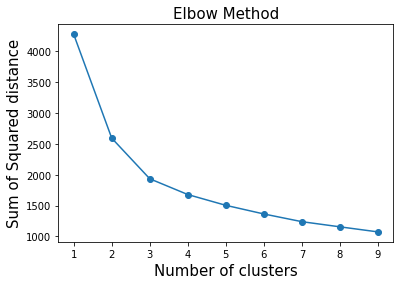

In [ ]:
# Digunakan untuk menentukan jumlah cluster yang optimal dengan elbow method

from sklearn.cluster import KMeans
inertia=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(dataScaler)
    inertia.append(kmean.inertia_)
    
plt.plot(K,inertia,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [ ]:
# Fungsi untuk menginisiasi suatu centroid secara random sejumlah k
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

# Fungsi untuk menghitung jarak data yang dekat dengan centroid menggunakan rumus
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

# Fungsi untuk mengupdate nilai centroid yang baru pada kelas
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [ ]:
# import library sebagai pendukung visualisasi
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [ ]:
# Fungsi untuk visualisasi data pada clustering
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

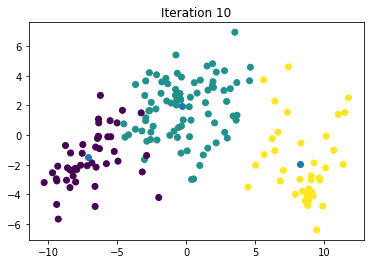

In [ ]:
# Melakukan main program pada algoritma Kmeans
max_iterations = 100
centroid_count = 3

# Inisiasi fungsi yang akan digunakan
centroids = random_centroids(dataScaler, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

# Melakukan perulangan apabila old centroid sama dengan centroid yang sudah diupdate
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(dataScaler, centroids)
    centroids = new_centroids(dataScaler, labels, centroid_count)
    plot_clusters(dataScaler, labels, centroids, iteration)
    iteration += 1

In [ ]:
# Menampilkan random centroid yang terpilih
centroids

,0,1,2
child_mort,7.156096,2.232049,1.201159
exports,3.582397,5.000871,6.042702
health,4.055404,4.391077,5.661726
imports,4.734300,5.404456,5.148800
income,1.422582,2.883603,8.460728
inflation,5.510644,4.586918,3.328406
life_expec,3.984281,7.939791,10.096541
total_fer,7.322861,2.767932,2.019493
gdpp,1.338011,2.498259,9.818266


In [ ]:
# Menghitung jumlah setiap kelas 
labels.value_counts()

1    82
0    46
2    39
dtype: int64

In [ ]:
# Memasukan data kelas pada dataframe
dataScaler['cluster'] = labels
dataScaler.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,5.264849,1.494820,4.586078,3.577649,1.080472,2.261436,5.753452,8.365931,1.030734,2
1,1.681597,2.395310,3.945929,3.790373,1.749331,1.803992,9.717949,1.788644,1.368334,0
2,2.202532,2.915594,2.466750,2.801493,1.988094,2.876906,9.757396,3.744479,1.403650,0
3,6.666991,4.111246,1.646364,3.462663,1.425352,3.459107,6.522682,8.902208,1.314883,2
4,1.374878,3.270788,3.622747,4.382551,2.486522,1.522133,9.816568,2.545741,2.142418,0


In [ ]:
# Menampilkan data yang masuk pada kelas 0
data[labels == 0][:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.200,10.00,7.58,44.9,1610.0,9.440,56.20,5.82,553.0
3,Angola,119.000,62.30,2.85,42.9,5900.0,22.400,60.10,6.16,3530.0
17,Benin,111.000,23.80,4.10,37.2,1820.0,0.885,61.80,5.36,758.0
25,Burkina Faso,116.000,19.20,6.74,29.6,1430.0,6.810,57.90,5.87,575.0
26,Burundi,93.600,8.92,11.60,39.2,764.0,12.300,57.70,6.26,231.0
28,Cameroon,108.000,22.20,5.13,27.0,2660.0,1.910,57.30,5.11,1310.0
31,Central African Republic,142.875,11.80,3.98,26.5,888.0,2.010,48.05,5.21,446.0
32,Chad,142.875,36.80,4.53,43.5,1930.0,6.390,56.50,6.59,897.0
36,Comoros,88.200,16.50,4.51,51.7,1410.0,3.870,65.90,4.75,769.0
37,"Congo, Dem. Rep.",116.000,41.10,7.91,49.6,609.0,20.800,57.50,6.54,334.0


In [ ]:
# Menampilkan data yang masuk pada kelas 1
data[labels == 1][:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0
5,Argentina,14.5,18.9,8.10,16.0,18700.0,20.900,75.8,2.37,10300.0
6,Armenia,18.1,20.8,4.40,45.3,6700.0,7.770,73.3,1.69,3220.0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000.0,13.800,69.1,1.92,5840.0
12,Bangladesh,49.4,16.0,3.52,21.8,2440.0,7.140,70.4,2.33,758.0
13,Barbados,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0
14,Belarus,5.5,51.4,5.61,64.5,16200.0,15.100,70.4,1.49,6030.0
16,Belize,18.8,58.2,5.20,57.5,7880.0,1.140,71.4,2.71,4340.0


In [ ]:
# Menampilkan data yang masuk pada kelas 2
data[labels == 2][:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400.0,1.160,82.0,1.93,33130.0
8,Austria,4.3,51.3,11.00,47.8,43200.0,0.873,80.5,1.44,33130.0
10,Bahamas,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0
11,Bahrain,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0
15,Belgium,4.5,76.4,10.70,74.7,41100.0,1.880,80.0,1.86,33130.0
23,Brunei,10.5,67.4,2.84,28.0,51967.5,16.700,77.1,1.84,33130.0
29,Canada,5.6,29.1,11.30,31.0,40700.0,2.870,81.3,1.63,33130.0
42,Cyprus,3.6,50.2,5.97,57.5,33900.0,2.010,79.9,1.42,30800.0
43,Czech Republic,3.4,66.0,7.88,62.9,28300.0,-1.430,77.5,1.51,19800.0
44,Denmark,4.1,50.5,11.40,43.6,44000.0,3.220,79.5,1.87,33130.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

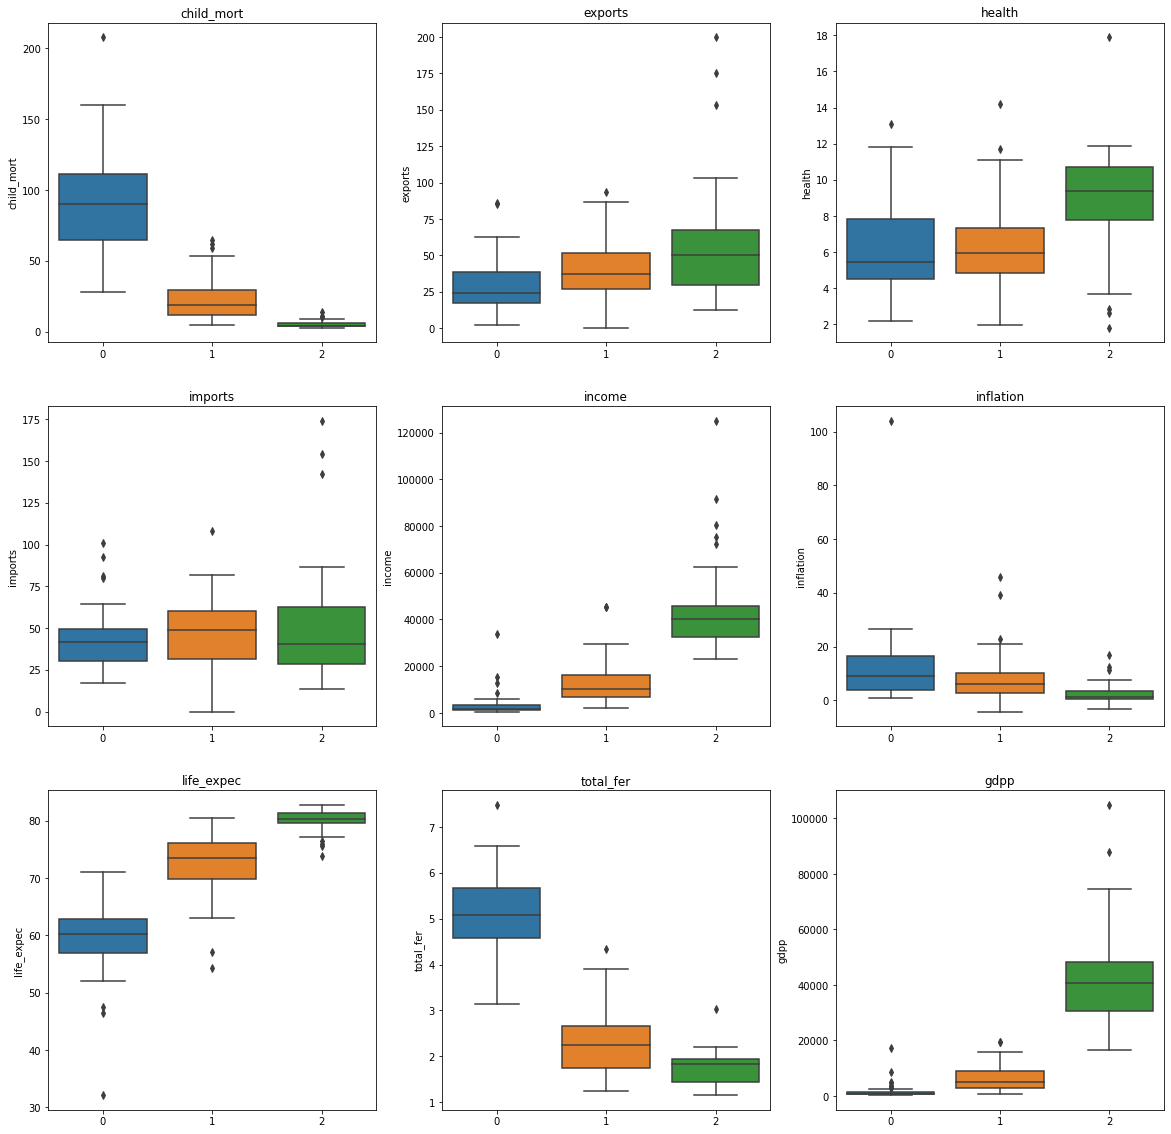

In [ ]:
# Melakukan visualisasi menggunakan boxplot pada setiap kelas
l=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(labels,data[l[i]])
    plt.title(l[i])